In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.approvalwise_vector import uniform_approvalwise_vector, _get_prob_distr_next_height, not_uniform_sample_approvalwise_vector
from scripts.sampling_methods import random_approvalwise_vectors, sample_approvalwise_vector_with_resampling
import numpy as np

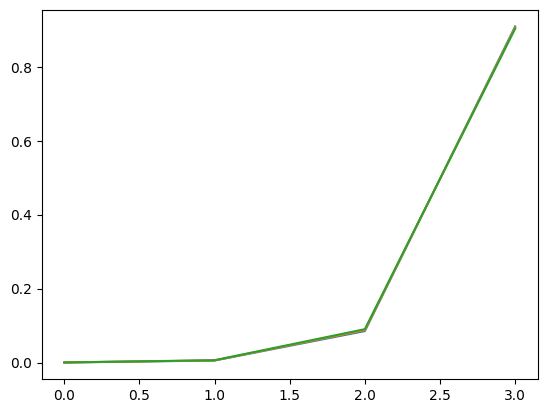

In [35]:
M = 3
N = 30
for t in range(2, M+2):
    plt.plot(list(range(0, M + 1)), _get_prob_distr_next_height(N, M, t)[::])

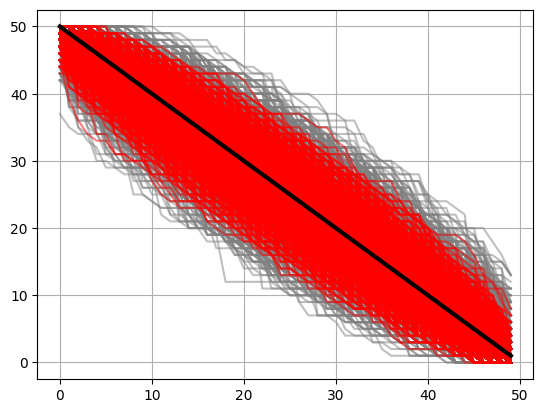

In [25]:
samples = 4000
for _ in range(samples):
    plt.plot(uniform_approvalwise_vector(50, 50), color='gray', alpha=0.5)
for _ in range(samples):
    plt.plot(random_approvalwise_vectors(50, 50, tries=1)[0], color='red', alpha=0.5)

plt.plot(np.arange(50, 0, -1), color='black', linewidth=3, zorder=20)
# plt.scatter(list(range(50)), np.arange(50, 0, -1), color='black', zorder=20)
plt.grid(True)


In [47]:
samples = 40000
N, M = 50, 50
samples_approvalwise_vectors = np.array([uniform_approvalwise_vector(N, M) for _ in range(samples)])
not_uniform_samples_approvalwise_vectors = np.array([random_approvalwise_vectors(N, M, tries=1)[0] for _ in range(samples)])

In [60]:
rng = np.random.RandomState()
resampling_avs = np.array([sample_approvalwise_vector_with_resampling(N, M, rng=rng) for _ in range(samples)])

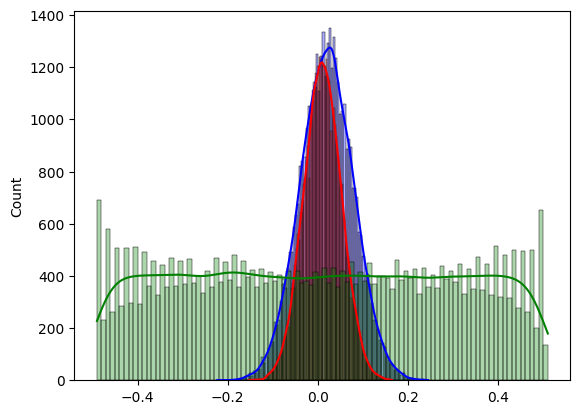

In [66]:
means = np.sum(samples_approvalwise_vectors - np.arange(49, -1, -1), axis=1) / N / M
not_uniform_means = np.sum(not_uniform_samples_approvalwise_vectors - np.arange(49, -1, -1), axis=1) / N / M
resampling_means = np.sum(resampling_avs - np.arange(49, -1, -1), axis=1) / N / M

sns.histplot(x=means, bins=100, alpha=0.33, color='blue', kde=True)
sns.histplot(x=not_uniform_means, bins=100, alpha=0.33, color='red', kde=True)
sns.histplot(x=resampling_means, bins=100, alpha=0.33, color='green', kde=True)
None

In [54]:
np.mean(means)

0.01955419999999997

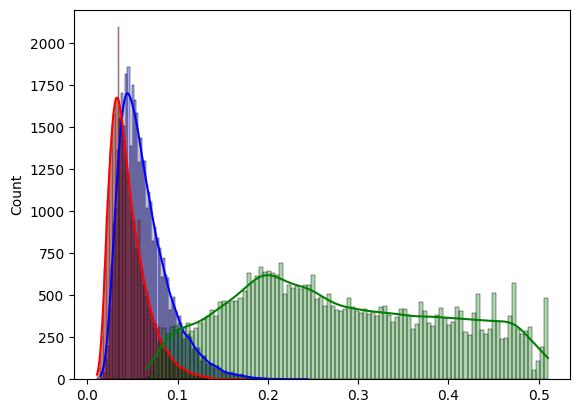

In [65]:
means = np.sum(np.abs(samples_approvalwise_vectors - np.arange(50, 0, -1)), axis=1) / N / M
not_uniform_means = np.sum(np.abs(not_uniform_samples_approvalwise_vectors - np.arange(50, 0, -1)), axis=1) / N / M
resampling_means = np.sum(np.abs(resampling_avs - np.arange(50, 0, -1)), axis=1) / N / M

sns.histplot(x=means, bins=100, alpha=0.33, color='blue', kde=True)
sns.histplot(x=not_uniform_means, bins=100, alpha=0.33, color='red', kde=True)
sns.histplot(x=resampling_means, bins=100, alpha=0.33, color='green', kde=True)
None

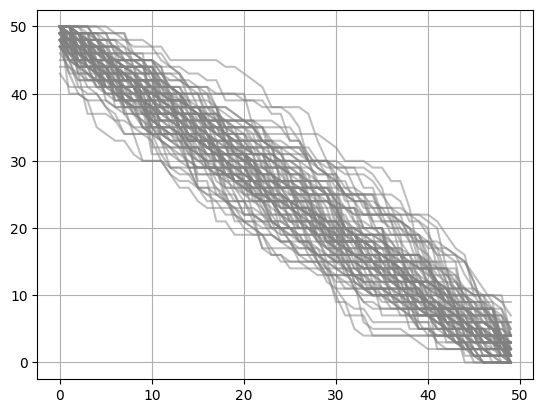

In [75]:
for _ in range(100):
    plt.plot(uniform_approvalwise_vector(50, 50), color='gray', alpha=0.5)
plt.grid(True)

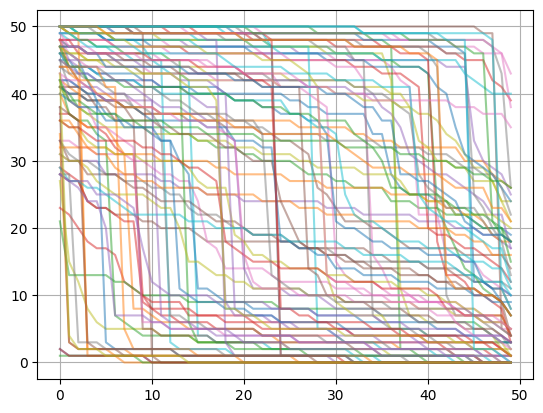

In [76]:
for _ in range(100):
    plt.plot(sample_approvalwise_vector_with_resampling(50, 50, rng=rng), alpha=0.5)
plt.grid(True)

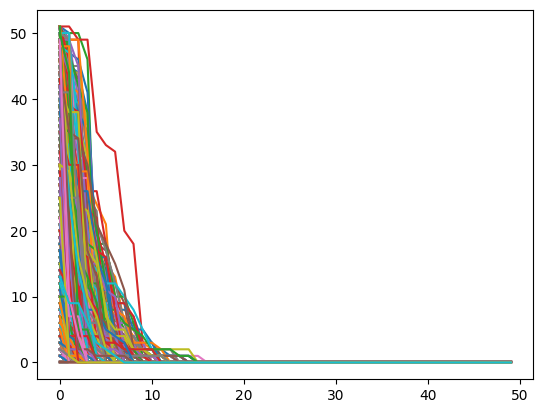

In [4]:
for _ in range(4000):
    plt.plot(not_uniform_sample_approvalwise_vector(50, 50))

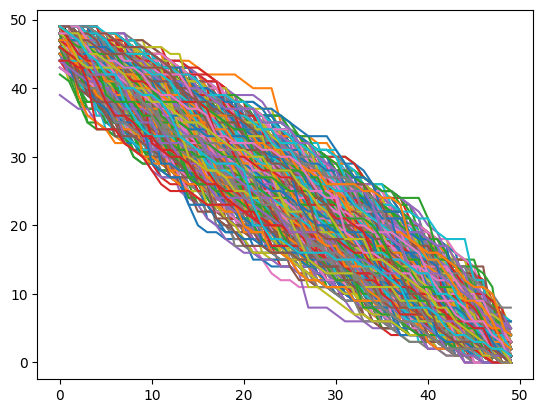

In [38]:
for _ in range(4000):
    plt.plot(random_approvalwise_vectors(50, 50, tries=1)[0])

